# **EXPLORATORY DATA ANALYSIS**
A notebook to explore characteristics of the data

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import copy
import pandas as pd
import numpy as np
import os
PRJ_ROOT_DIR = os.path.dirname(os.path.abspath(''))

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

In [2]:
# Where to save the figures
NOTE_ROOT_DIR = os.path.abspath('')
CHAPTER_ID = "02_exploratory_data_analysis"
IMAGES_PATH = os.path.join(NOTE_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## **1 - Load the Data**

In [3]:
# Load EPL match data
df_match = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "clean", "matches.csv"))
df_match.head()

,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,home/mf_2,home/mf_3,...,away/mf_2,away/mf_3,away/mf_4,away/fw_0,away/fw_1,away/fw_2,home/name,away/name,home_result,season
0,37096.0,55459.0,166640.0,219924.0,81012.0,NaN,101537.0,57531.0,86934.0,54102.0,...,20664.0,NaN,NaN,103955.0,205651.0,103025.0,West Ham United,Manchester City,lose,2019/20
1,37915.0,38290.0,55605.0,173904.0,158534.0,NaN,157668.0,62974.0,45268.0,231372.0,...,85242.0,148508.0,193488.0,213345.0,NaN,NaN,Tottenham Hotspur,Aston Villa,win,2019/20
2,116535.0,171287.0,97032.0,122798.0,169187.0,NaN,116643.0,41733.0,56979.0,NaN,...,71738.0,90440.0,78607.0,57127.0,NaN,NaN,Liverpool,Norwich City,win,2019/20
3,98747.0,68983.0,17761.0,51927.0,39487.0,NaN,40145.0,60586.0,433154.0,60551.0,...,101178.0,213482.0,NaN,84939.0,200439.0,83283.0,Burnley,Southampton,win,2019/20
4,51940.0,184667.0,95658.0,106760.0,214590.0,NaN,74208.0,176297.0,109322.0,156689.0,...,88894.0,49579.0,184341.0,173879.0,NaN,NaN,Manchester United,Chelsea,win,2019/20


In [4]:
# Load EPL player data
df_player = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "clean", "players.csv"))
df_player.head()

,defence/clean_sheets,defence/goals_conceded,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/interceptions,defence/clearances,defence/headed_clearance,defence/clearances_off_line,...,goalkeeping/goal_kicks,defence/recoveries,defence/duels_won,defence/duels_lost,teamplay/passes,teamplay/crosses,teamplay/accurate_long_balls,id,name,season
0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,14.0,11.0,0.0,...,0.0,0.0,0.0,0.0,241.0,1.0,0.0,54861.0,Christian Benteke,2018/19
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213405.0,Filip Benkovic,2018/19
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449926.0,Adrián Bernabé,2018/19
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182436.0,Ben Woodburn,2018/19
4,0.0,0.0,49.0,0.0,0.0,9.0,27.0,12.0,2.0,0.0,...,0.0,0.0,0.0,0.0,806.0,51.0,0.0,100649.0,Bernard,2018/19


**NOTE:** The match data contains player IDs, which is not statistical. Therefore, the notebook will mostly exploit the player data.

## **2 - EPL Player**

### **2.1 - Univariate Analysis**

Saving figure players_by_season


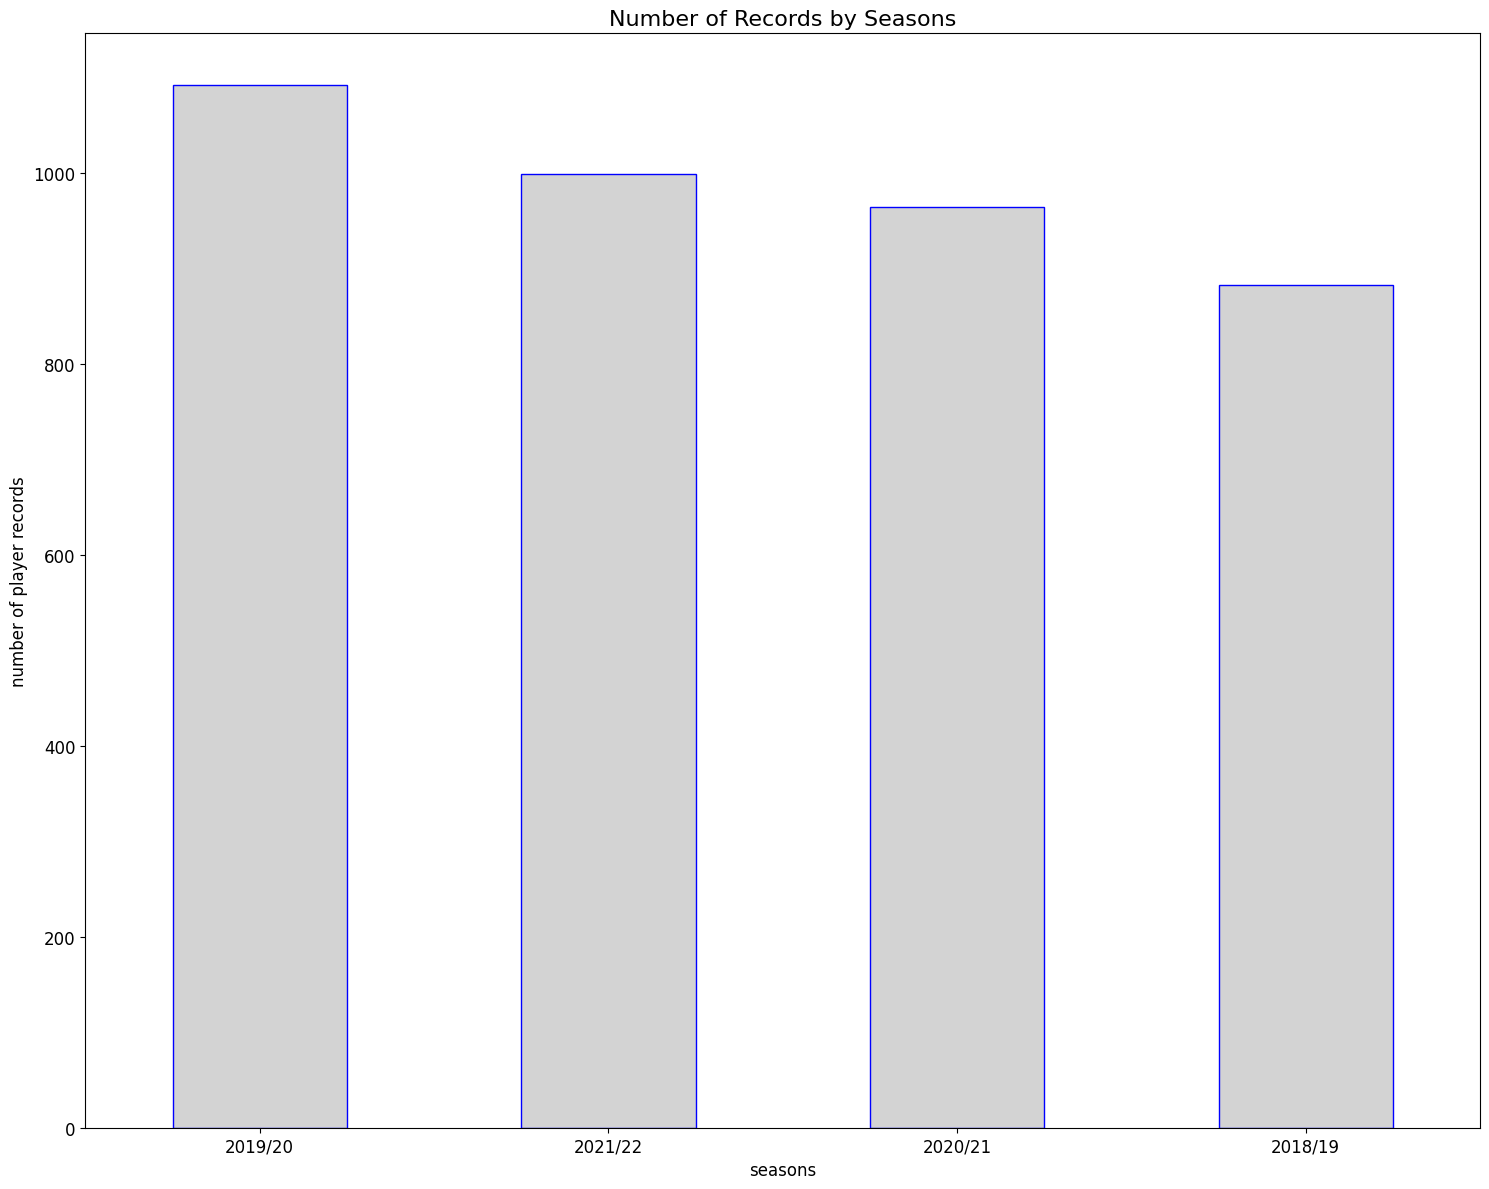

In [5]:
# Number of player records for each season
ax = df_player['season'].value_counts().plot(kind='bar', figsize=(15, 12), 
                                             color="#D3D3D3", edgecolor='blue')

ax.set_title('Number of Records by Seasons', size=16)
ax.set_xlabel('seasons', size=12)
ax.set_ylabel('number of player records', size=12)
plt.xticks(rotation=0)
save_fig("players_by_season")

In [6]:
# Statistics of player performance
df_player.iloc[:, :-3].describe()

,defence/clean_sheets,defence/goals_conceded,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/interceptions,defence/clearances,defence/headed_clearance,defence/clearances_off_line,...,goalkeeping/catches,goalkeeping/sweeper_clearances,goalkeeping/throw_outs,goalkeeping/goal_kicks,defence/recoveries,defence/duels_won,defence/duels_lost,teamplay/passes,teamplay/crosses,teamplay/accurate_long_balls
count,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,...,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000
mean,1.055344,5.575019,13.073369,19.894643,0.041381,2.795887,8.420919,15.078700,7.885250,0.050520,...,0.144961,0.293983,3.460015,5.791064,35.829906,32.228738,29.190404,368.453922,15.331048,20.152831
std,3.060999,13.918563,24.690321,29.029561,0.239696,6.419757,16.913893,33.473023,18.020614,0.295963,...,1.027087,2.213673,23.520004,37.635204,75.709846,65.828349,62.355558,638.183509,51.516328,50.918182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
75%,0.000000,0.000000,19.000000,51.000000,0.000000,3.000000,11.000000,14.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,48.000000,44.000000,39.000000,603.000000,8.000000,18.000000
max,63.000000,178.000000,491.000000,100.000000,3.000000,121.000000,293.000000,440.000000,226.000000,5.000000,...,21.000000,56.000000,559.000000,821.000000,1448.000000,1128.000000,1350.000000,11873.000000,1797.000000,1262.000000


**CAUTION:** Some features are mostly zero (e.g. `defence_clean sheets`), which shows redundancy and sparsity.

Saving figure player_histogram_plots


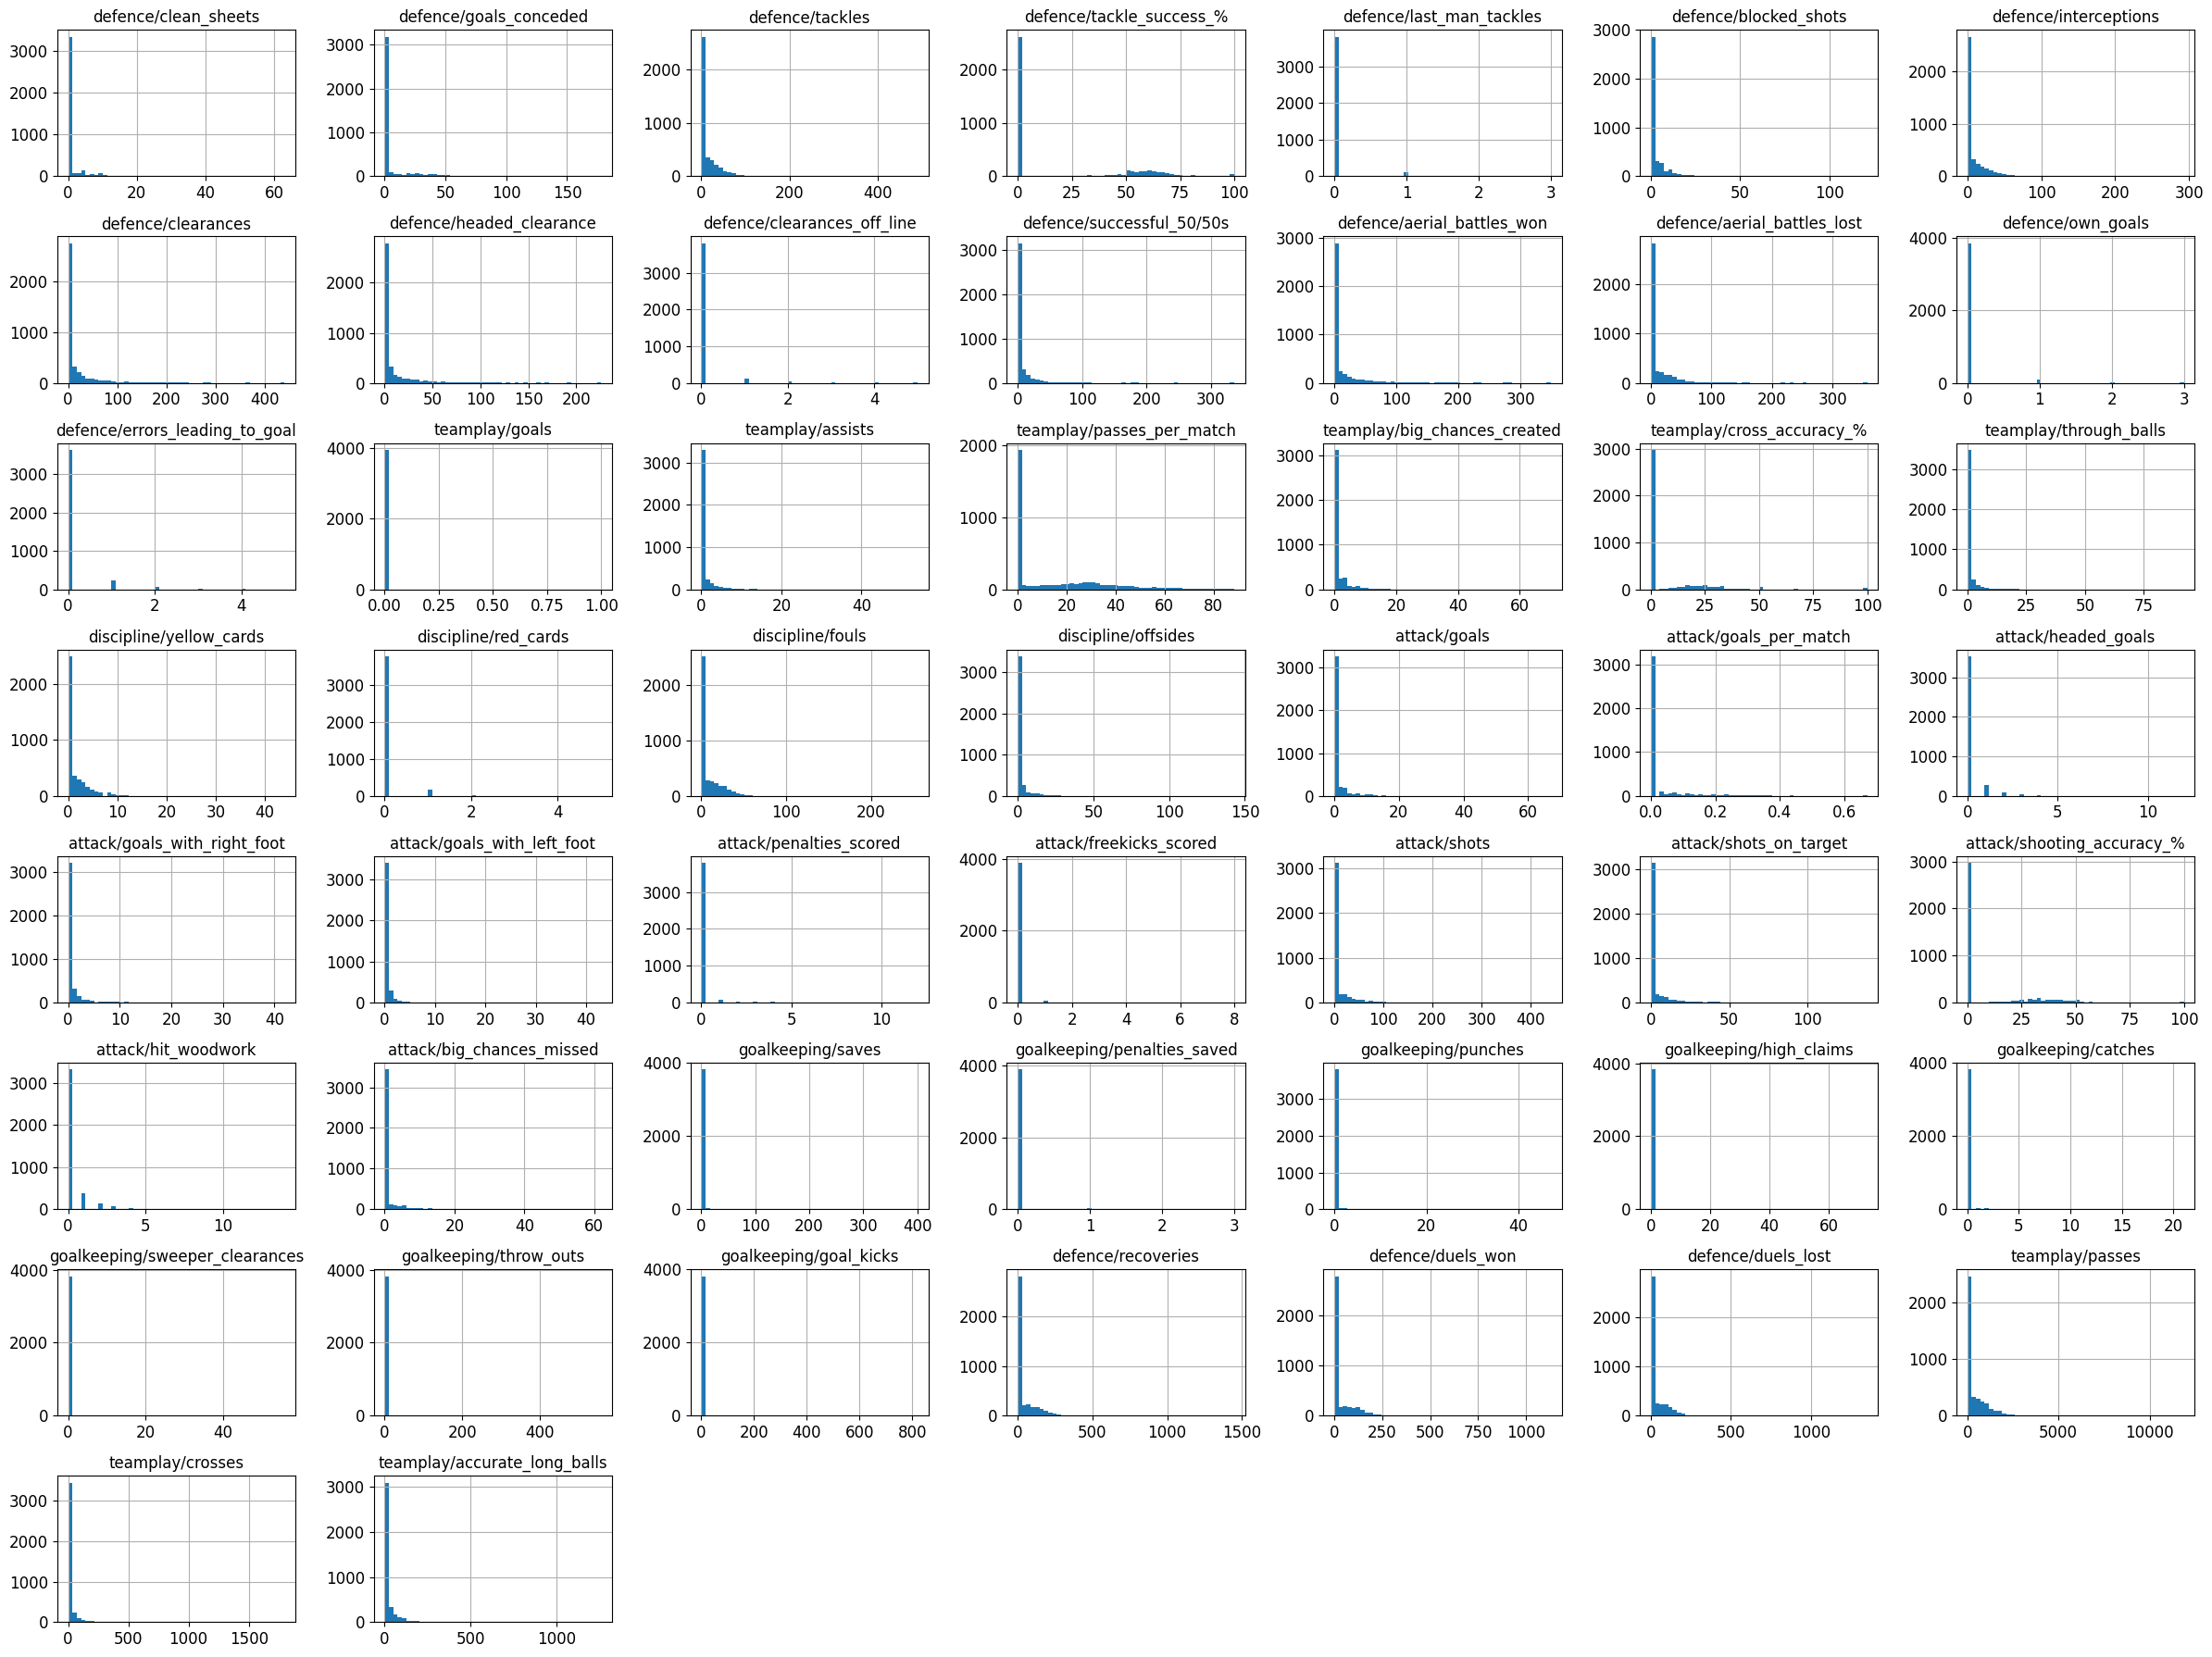

In [7]:
# Histogram of numerical variables
df_player.iloc[:, :-3].hist(bins=50, figsize=(24, 18))
plt.tight_layout()
save_fig("player_histogram_plots")

**CAUTION:** The data is heavily skew to the left-hand side and many features has the mode 0.0. The range of features varies critically and some have very extreme outliers compared to their crowd (surrounding 0.0). 

### **2.2 - Multivariate Analysis**

Saving figure player_performance_correlation


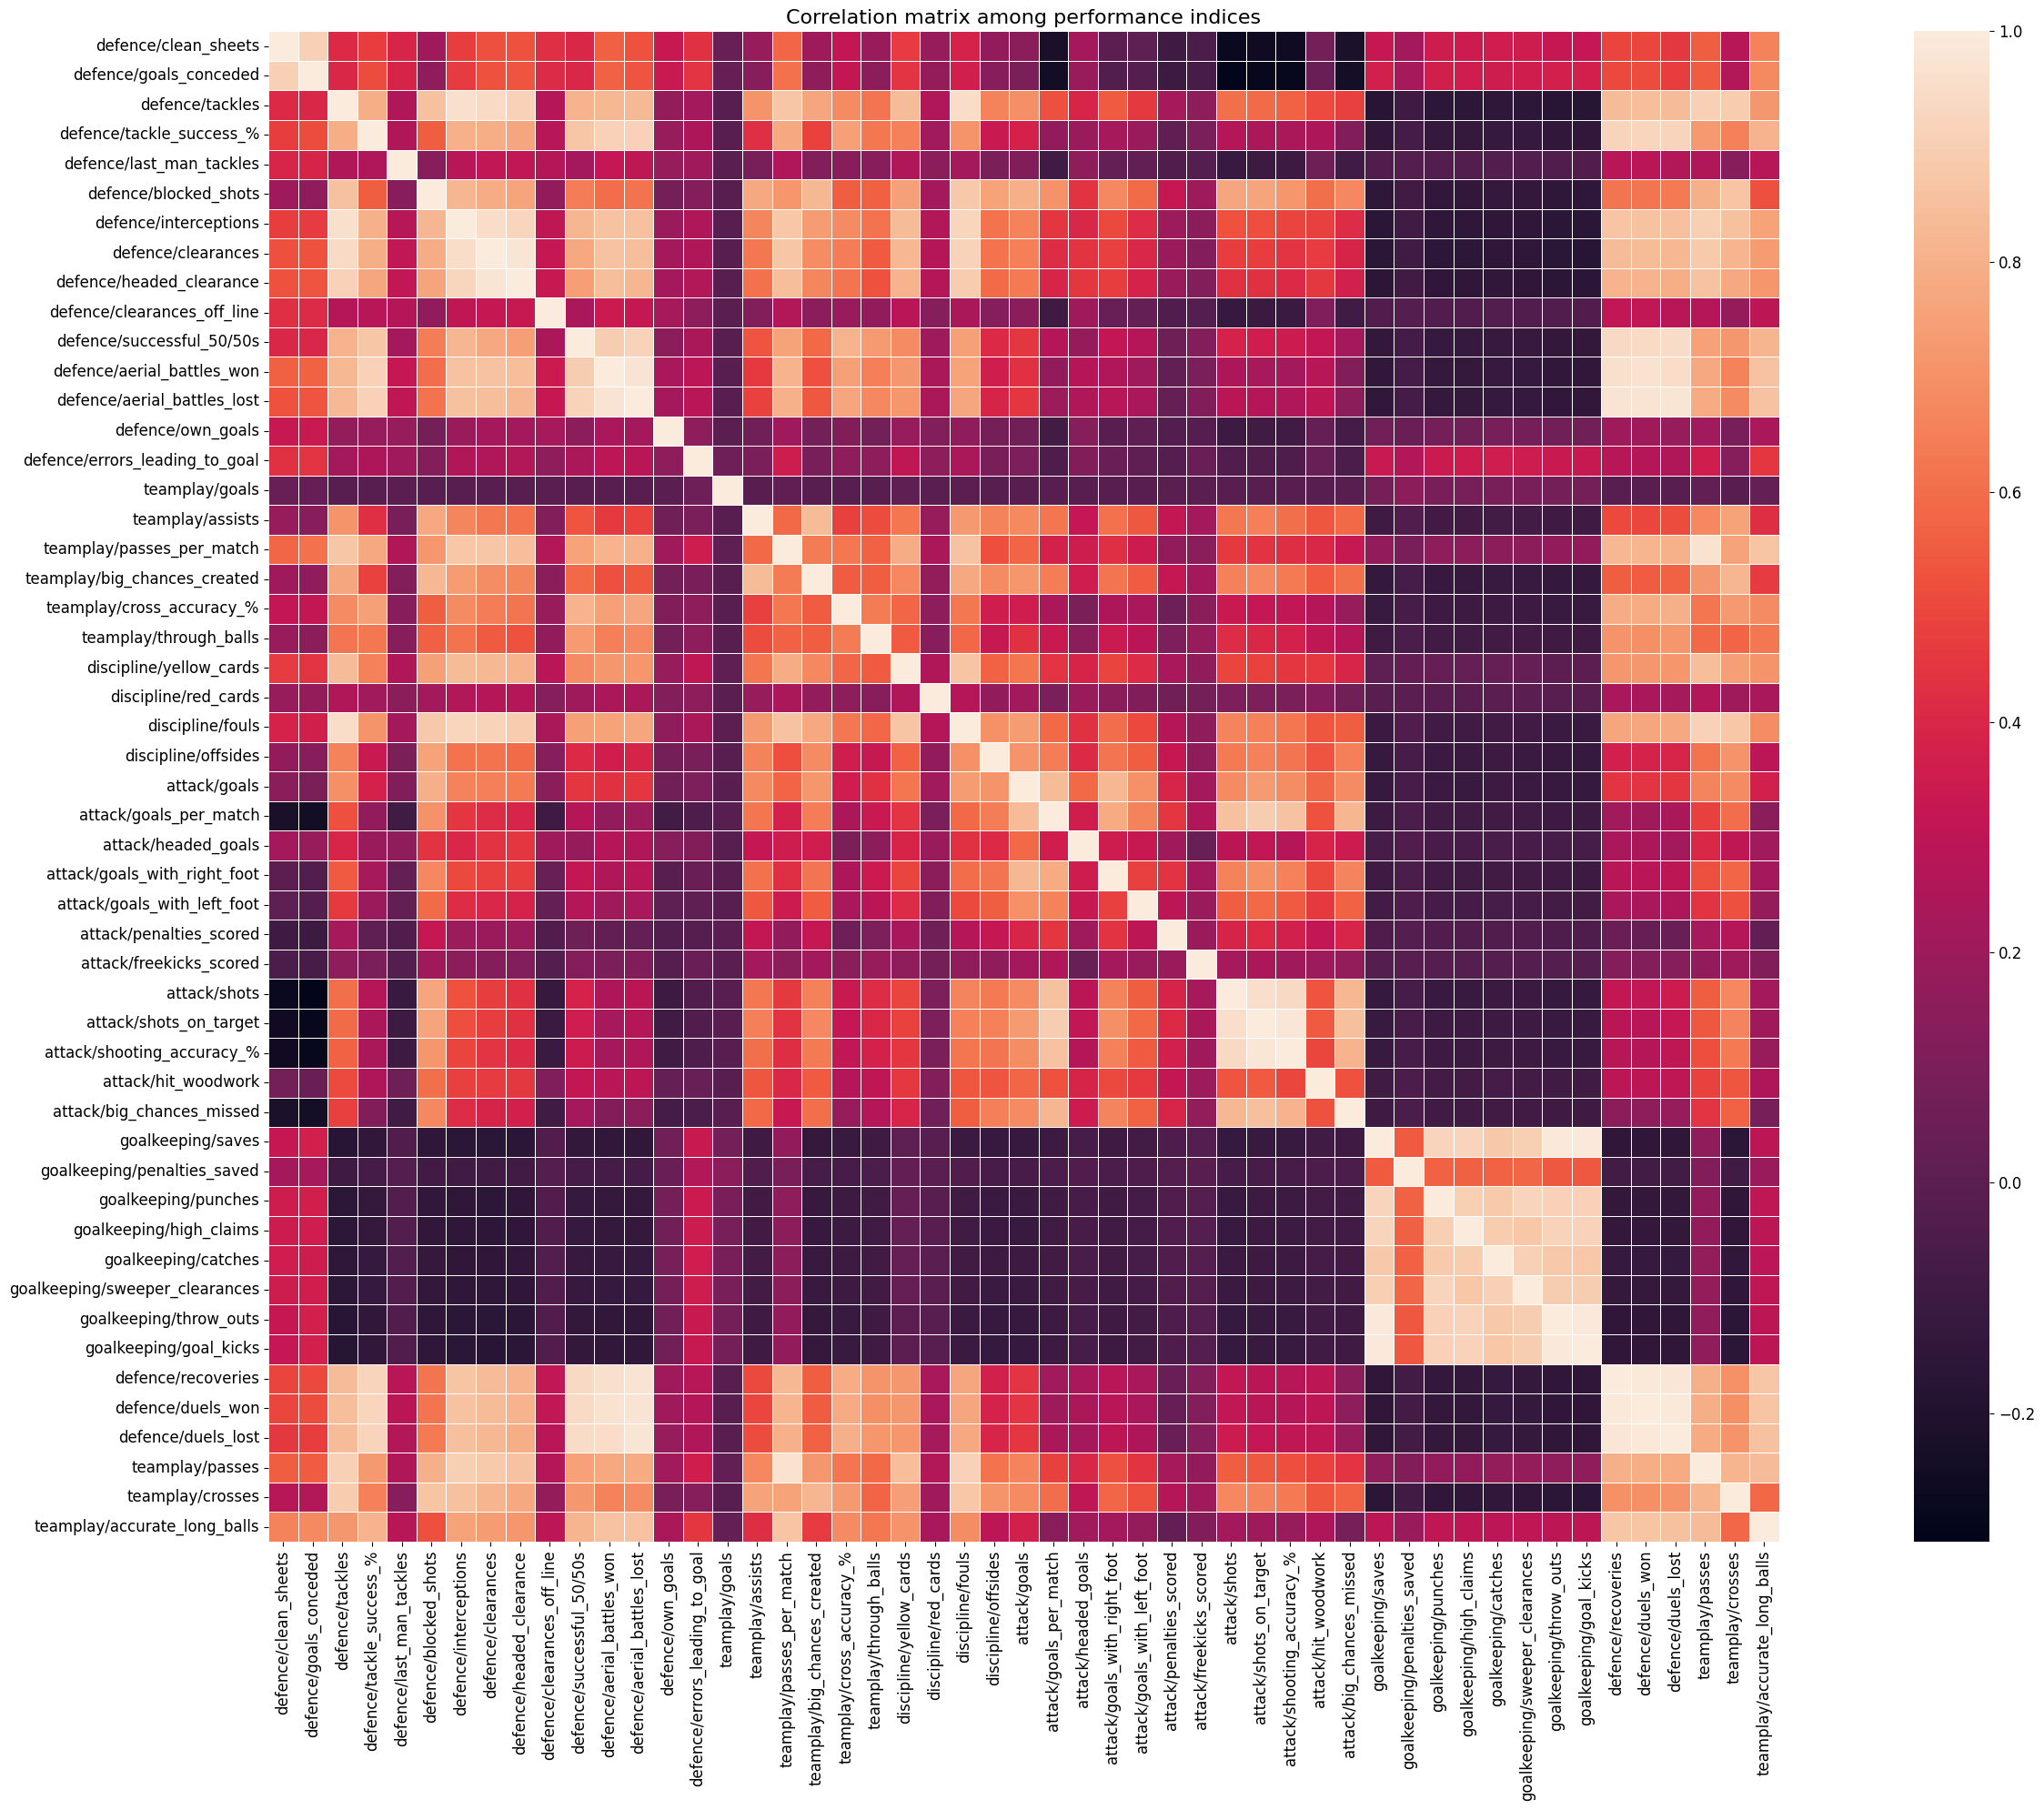

In [8]:
# Correlation among performance indices of players
corr_mat = df_player.iloc[:, :-3].corr(method="spearman")

plt.figure(figsize=(30, 20))
sns.heatmap(corr_mat, square=True, annot=False, linewidths=.5)
plt.title("Correlation matrix among performance indices", size=16)
plt.tight_layout()
save_fig("player_performance_correlation")

In [9]:
# Get the most correlated pairs of indices
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

tri_corr_mat = corr_mat.unstack()
cells_to_drop = get_redundant_pairs(df_player.iloc[:, :-3])
tri_corr_mat = tri_corr_mat.drop(labels=cells_to_drop).sort_values(ascending=False)

print("Top 10 positive correlated feature pairs:\n" + str(tri_corr_mat[0:10]))
print("\n----------------------------------------------------------------")
print("\nTop 10 negative correlated feature pairs:\n"+ str(tri_corr_mat[-10:]))
print("\n----------------------------------------------------------------")
print("\nTop 20 feature pairs:\n" + str(tri_corr_mat.abs().sort_values(ascending=False)[:10]))

Top 10 positive correlated feature pairs:
goalkeeping/saves            goalkeeping/goal_kicks        0.993823
goalkeeping/throw_outs       goalkeeping/goal_kicks        0.993721
goalkeeping/saves            goalkeeping/throw_outs        0.993633
defence/recoveries           defence/duels_won             0.986473
defence/duels_won            defence/duels_lost            0.986443
defence/recoveries           defence/duels_lost            0.983711
attack/shots_on_target       attack/shooting_accuracy_%    0.982773
defence/clearances           defence/headed_clearance      0.976991
defence/aerial_battles_lost  defence/duels_lost            0.975069
                             defence/duels_won             0.973900
dtype: float64

----------------------------------------------------------------

Top 10 negative correlated feature pairs:
defence/clean_sheets    attack/big_chances_missed    -0.214504
                        attack/goals_per_match       -0.222636
defence/goals_conceded  atta

In [10]:
# Percentage of feature pairs having a strong correlation 
tri_corr_mat_pos = tri_corr_mat.abs().sort_values(ascending=False)
len(tri_corr_mat_pos[tri_corr_mat_pos > 0.40]) / len(tri_corr_mat_pos)

0.3686274509803922

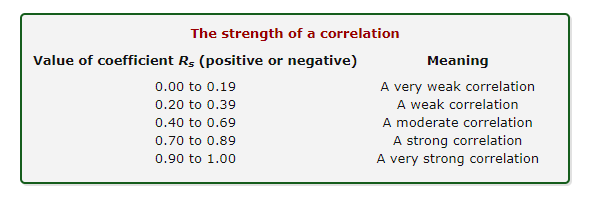

**NOTE:** There are approx. 36% feature pairs correlating more than 0.4. Hence, we reduce the dimensionality of the data to transform the variables and extract only the significant information for each position (goalkeeper/forward/midfielder/defender).

### **2.3 - Dimensionality Reduction**
This section is also to eliminate the redundancy of the data, which has been not done in `01_data_cleaning`.

In [9]:
# Import & setup transformers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_player.iloc[:, :-3]
X.head()

,defence/clean_sheets,defence/goals_conceded,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/interceptions,defence/clearances,defence/headed_clearance,defence/clearances_off_line,...,goalkeeping/catches,goalkeeping/sweeper_clearances,goalkeeping/throw_outs,goalkeeping/goal_kicks,defence/recoveries,defence/duels_won,defence/duels_lost,teamplay/passes,teamplay/crosses,teamplay/accurate_long_balls
0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,14.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,49.0,0.0,0.0,9.0,27.0,12.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,806.0,51.0,0.0


Saving figure explained_variance_plot


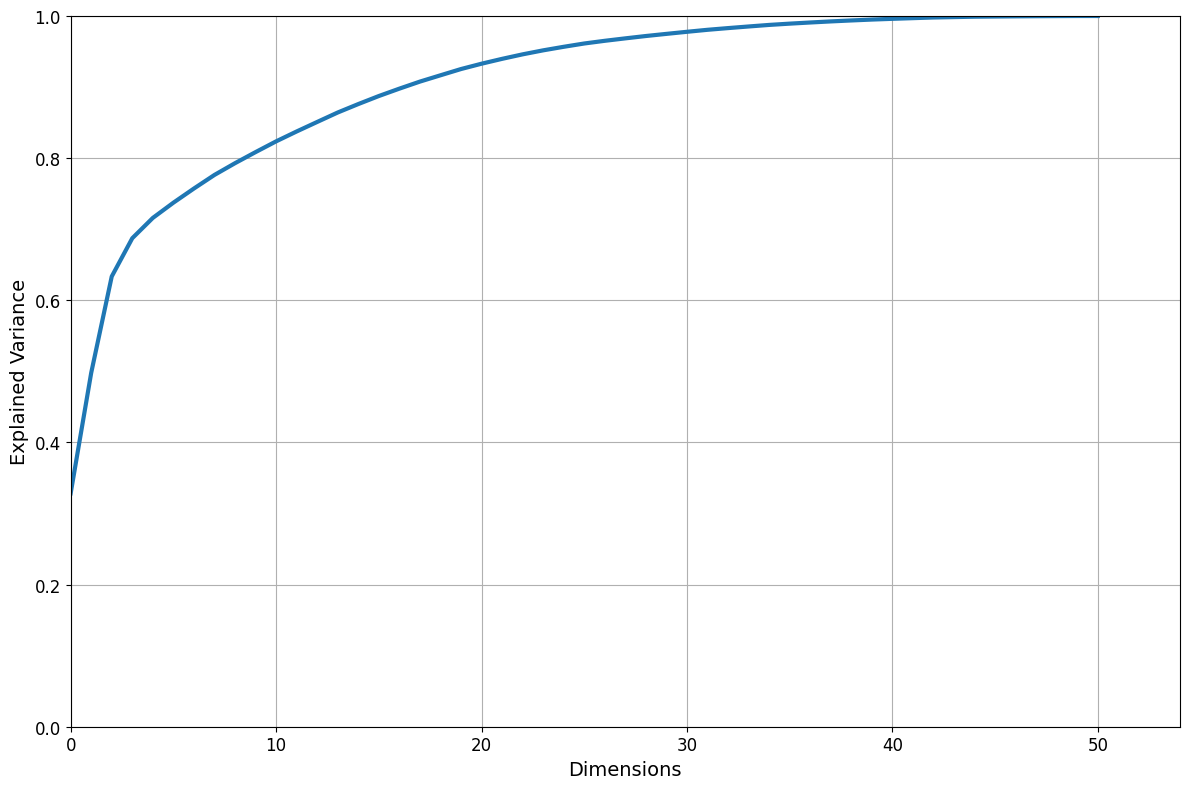

In [10]:
# Explained variance ratio on the number of dimensions
dim_reduce_observe = Pipeline([
    ("scaler", StandardScaler()),
    ("dim_reductor", PCA())
])

dim_reduce_observe.fit(X)
cumsum = np.cumsum(dim_reduce_observe["dim_reductor"].explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 54, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

plt.grid(True)
save_fig("explained_variance_plot")

In [11]:
# The elbow is on 4 PCs (principal components) (~70% preserved)
dim_reduce_elbow = Pipeline([
    ("scaler", StandardScaler()),
    ("dim_reductor", PCA(n_components=4))
])
X_reduced_elbow = dim_reduce_elbow.fit_transform(X)
np.sum(dim_reduce_elbow["dim_reductor"].explained_variance_ratio_)

0.6873337274219166

**CAUTION:** Despite 4 PCs being the elbow, PCA just drops too much information on this level (nearly half of information).

In [12]:
# Function to extract variables relevant to a PC
def feat_pc(axes, feats, n):
    ind = np.argsort(abs(axes[n]))[:]
    df = pd.DataFrame()
    df['variables'] = feats[ind][::-1]
    df['coef.'] = axes[n][ind][::-1]
    df['percentage'] = 100 * np.square(df['coef.'])
    return df

def feats_pc(axes, feats, n, stat="percentage"):
    df = feat_pc(axes, feats, n)
    skill_grps = ["attack", "defence", "teamplay", "discipline", "goalkeeping"]
    grp_percent = {}
    for skill in skill_grps:
        grp_percent[skill] = df[df["variables"].str.startswith(skill)][stat].sum()
    return df, grp_percent

#### Preserve 95% of Information

In [13]:
# Compute the minimum number of dimensions required to preserve 95% information
dim_reduce_95 = Pipeline([
    ("scaler", StandardScaler()),
    ("dim_reductor", PCA(n_components=0.95))
]) # preserve 95% information

X_reduced_95 = dim_reduce_95.fit_transform(X)
d = dim_reduce_95["dim_reductor"].n_components_
d

24

In [14]:
dim_reduce_95["dim_reductor"].components_

array([[ 0.09911353,  0.09691568,  0.21363885, ...,  0.2212729 ,
         0.17208198,  0.14228884],
       [ 0.23180723,  0.25071496,  0.03543094, ...,  0.08994294,
        -0.03587286,  0.21547734],
       [-0.01878668, -0.02844708, -0.08892005, ..., -0.01402872,
         0.01909018,  0.08475571],
       ...,
       [ 0.04163954,  0.02655149, -0.16426905, ...,  0.04035367,
        -0.2176335 ,  0.11034348],
       [-0.02491071, -0.05894933, -0.08382962, ..., -0.00449379,
        -0.02767303,  0.00529431],
       [ 0.53978319,  0.07788155,  0.01809356, ...,  0.06025212,
        -0.11727854, -0.07795678]])

In [15]:
# Significant features for each PC
feats = X.columns
axes = dim_reduce_95["dim_reductor"].components_ # change explained_variance_ratio if necessary

feat_percent_pcs = []
for i in range(dim_reduce_95["dim_reductor"].n_components_):
    pc, feat_percent_pc = feats_pc(axes, feats, i)
    feat_percent_pcs.append(feat_percent_pc)

df_feat_percent_pc = pd.DataFrame.from_records(feat_percent_pcs)
df_feat_percent_pc.iloc[df_feat_percent_pc.idxmax(), :]

,attack,defence,teamplay,discipline,goalkeeping
22,75.762197,5.919689,6.119532,12.141664,0.056918
8,2.845303,88.367006,2.084562,6.042754,0.660375
6,0.531506,3.009026,93.251752,0.260474,2.947242
7,10.138130,19.165776,12.009845,58.128137,0.558112
12,6.551293,22.208948,5.483394,1.129578,64.626787


**NOTE:** 5 PCs could be a representative for each role (e.g., $22^{th}$ PC represents the attack ability of a player).

In [16]:
feat_coef_pcs = []
for i in range(dim_reduce_95["dim_reductor"].n_components_):
    _, feat_coef_pc = feats_pc(axes, feats, i, "coef.")
    feat_coef_pcs.append(feat_coef_pc)

df_feat_coef_pc = pd.DataFrame.from_records(feat_coef_pcs)
df_feat_coef_pc.iloc[[22, 8, 6, 7, 12], :]

,attack,defence,teamplay,discipline,goalkeeping
22,-0.083973,-0.113092,0.136222,0.315850,0.064424
8,-0.098552,0.214912,0.005858,0.254696,0.051649
6,0.071898,0.067126,0.967859,0.029161,-0.152948
7,0.109240,-0.451056,-0.241883,0.862238,-0.183810
12,0.111614,0.398405,-0.228657,-0.072776,0.404677


#### Traceback Players' Role

In [17]:
# Assign role for players from the match data
df_player_pos = copy.deepcopy(df_player)
df_player_pos["position"] = np.nan
for id in df_player["id"].unique():
    for column in df_match.iloc[:, :-4].columns:
        if id in df_match[column].unique():
            df_player_pos.loc[df_player_pos["id"] == id, "position"] = column.split("/")[-1].split("_")[0]
            break
df_player_pos.head()

,defence/clean_sheets,defence/goals_conceded,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/interceptions,defence/clearances,defence/headed_clearance,defence/clearances_off_line,...,defence/recoveries,defence/duels_won,defence/duels_lost,teamplay/passes,teamplay/crosses,teamplay/accurate_long_balls,id,name,season,position
0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,14.0,11.0,0.0,...,0.0,0.0,0.0,241.0,1.0,0.0,54861.0,Christian Benteke,2018/19,fw
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,213405.0,Filip Benkovic,2018/19,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,449926.0,Adrián Bernabé,2018/19,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,182436.0,Ben Woodburn,2018/19,NaN
4,0.0,0.0,49.0,0.0,0.0,9.0,27.0,12.0,2.0,0.0,...,0.0,0.0,0.0,806.0,51.0,0.0,100649.0,Bernard,2018/19,mf


In [18]:
# Number of players with missing role
df_player_pos["position"].notnull().sum()

2300

In [20]:
# Number of players in each role
df_player_pos.dropna()["position"].value_counts()

df    929
mf    928
fw    241
gk    202
Name: position, dtype: int64

**CAUTION:** The number of two roles (gk & fw) are much less than the others.

## **3 - EPL Match**

Saving figure match_home_results_by_seasons


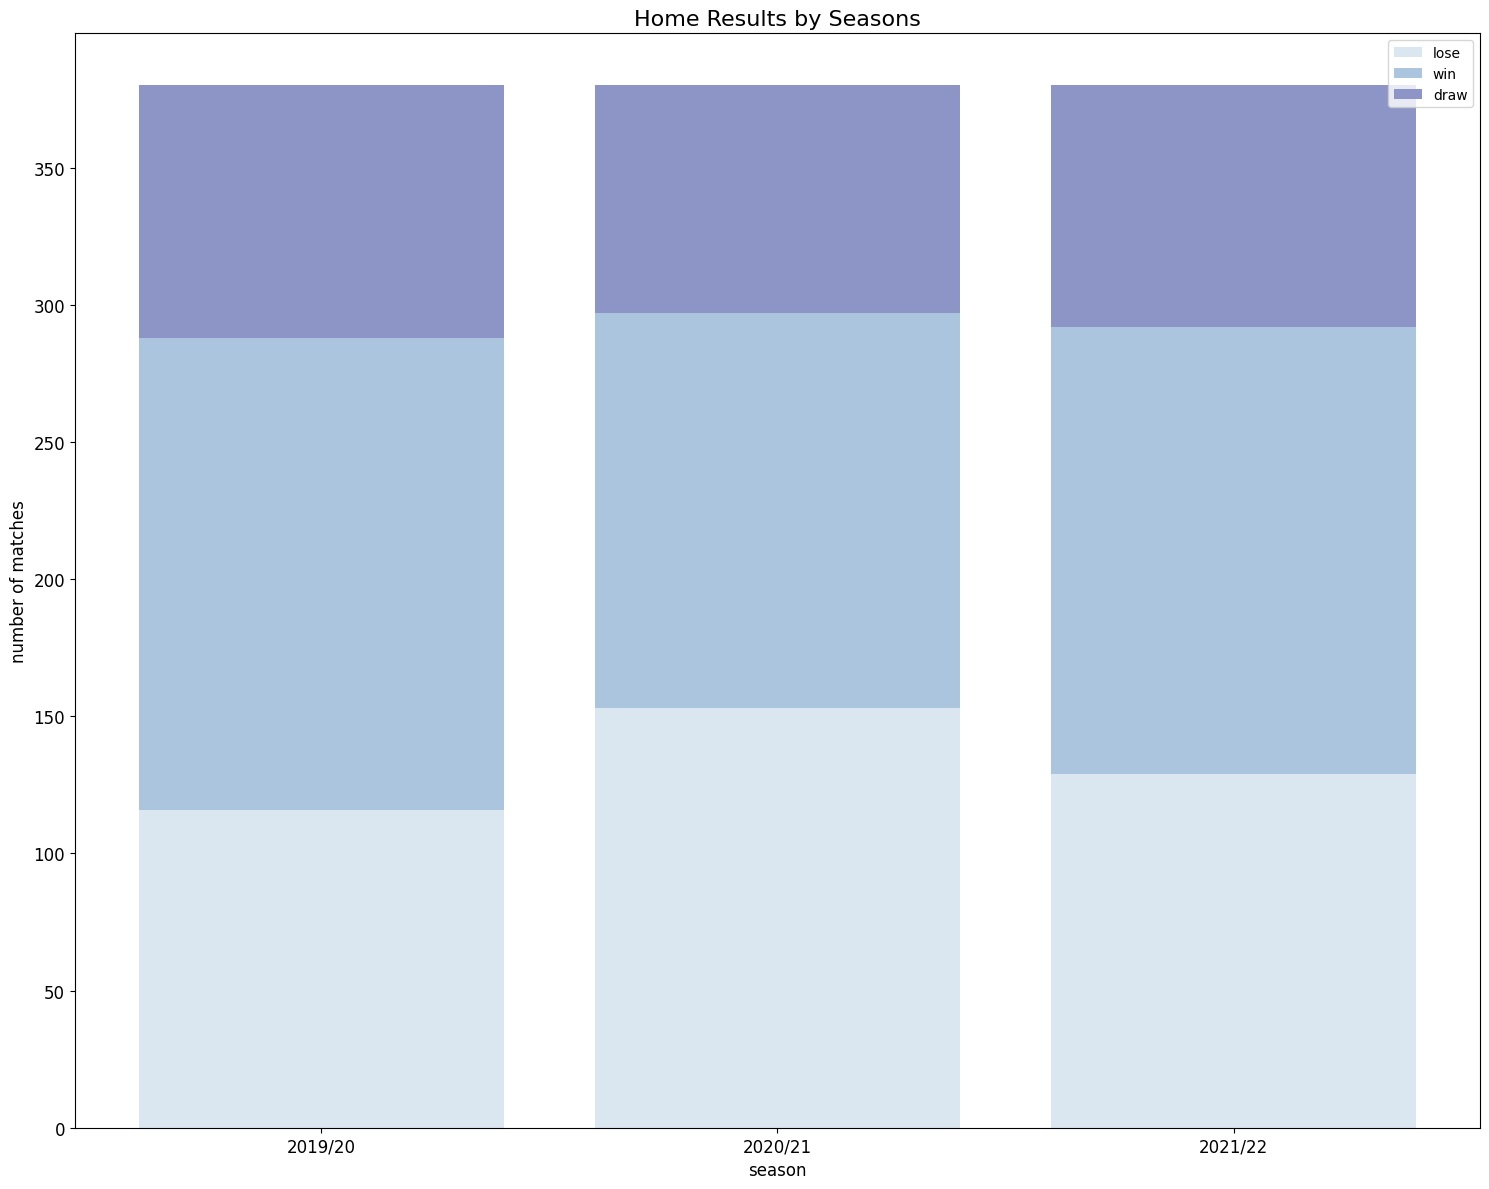

In [11]:
# Home results by each season
seasons = df_match['season'].unique()
home_results = df_match['home_result'].unique()

c = 0
colors = plt.cm.BuPu(np.linspace(0.15, 0.5, len(home_results)))
plt.figure(figsize=(15, 12))

y_bottom = np.array([0] * len(seasons))
for home_result in home_results:
    home_result_count = df_match[df_match['home_result'] == home_result]['season'].value_counts(sort=False)
    plt.bar(seasons, home_result_count, bottom=y_bottom, color=colors[c])

    y_bottom = y_bottom + np.array(home_result_count)
    c += 1

plt.xlabel('season', size=12)
plt.ylabel('number of matches', size=12)
plt.title('Home Results by Seasons', size=16)
plt.legend(home_results)
plt.tight_layout()
save_fig("match_home_results_by_seasons")

Saving figure match_by_resutls


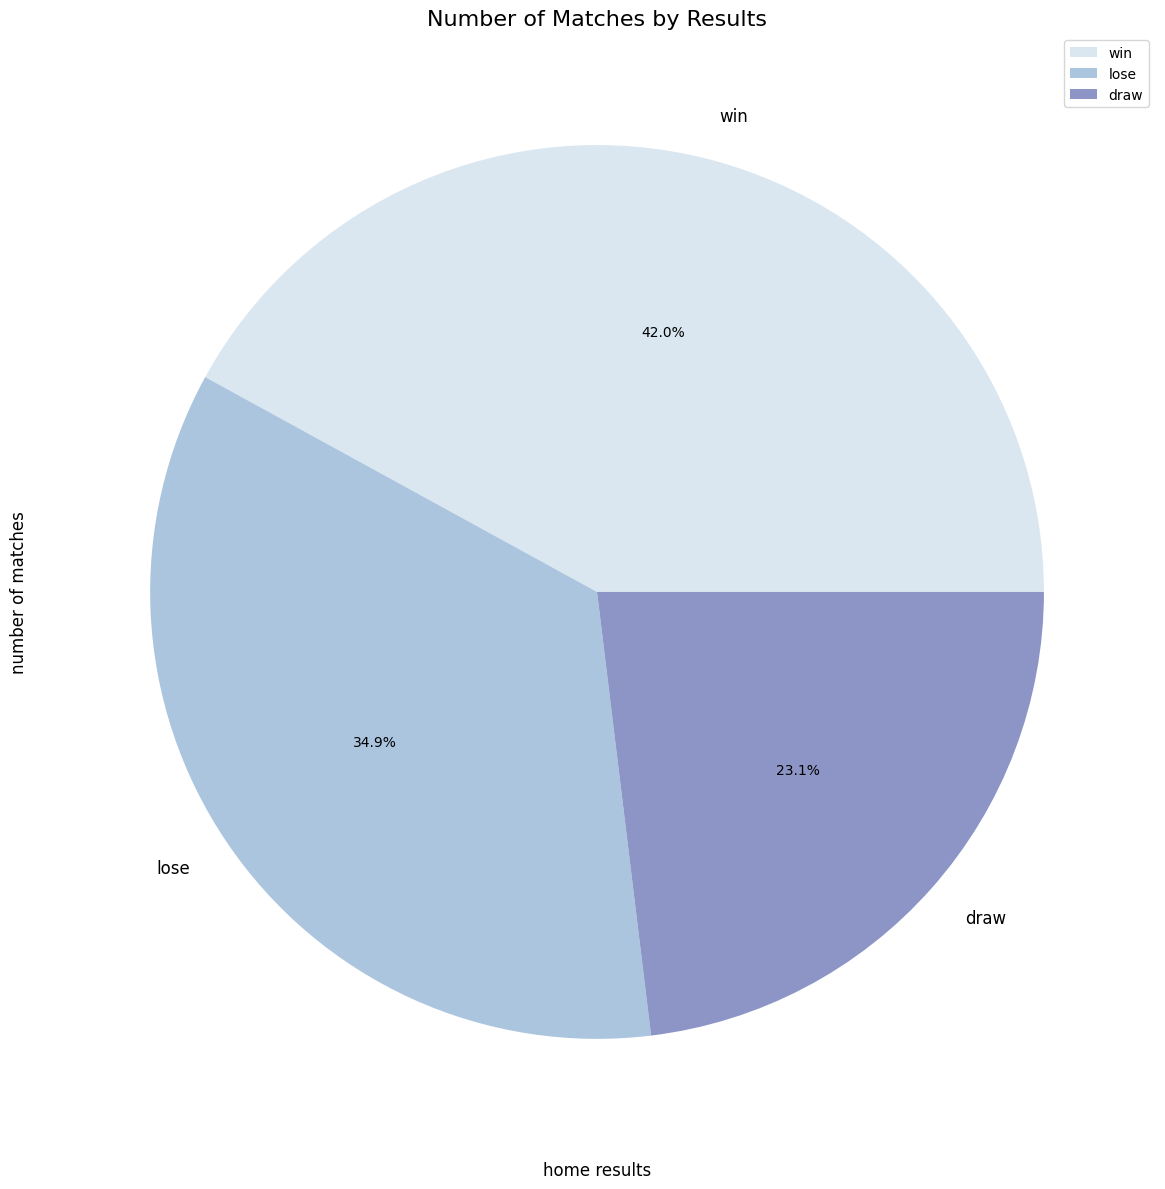

In [13]:
# Matches by results (win/draw/lose)
colors = plt.cm.BuPu(np.linspace(0.15, 0.5, 3))
ax = df_match['home_result'].value_counts().plot(kind='pie', figsize=(15, 12), 
                                                 colors=colors, autopct='%1.1f%%')

ax.set_title('Number of Matches by Results', size=16)
ax.set_xlabel('home results', size=12)
ax.set_ylabel('number of matches', size=12)
ax.legend()
plt.xticks(rotation=0)
plt.tight_layout()
save_fig("match_by_resutls")

## 4 - Save the Work

In [15]:
# Where to save dataframe
def save_df(df, path, extension="csv", index=False):
    df.to_csv(path, index=index)

In [25]:
# Save match data
save_df(df_match, os.path.join(PRJ_ROOT_DIR, "data", "tabular", "exploratory", "matches.csv"))

In [27]:
# Save player data
save_df(df_player_reduced.drop("position", axis=1), os.path.join(PRJ_ROOT_DIR, "data", "tabular", "exploratory", "players_pca.csv"))

In [17]:
# Save player data with position
save_df(df_player_pos.dropna(), os.path.join(PRJ_ROOT_DIR, "data", "tabular", "exploratory", "players_with_position.csv"))